In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

# Load the measurement matrix and sinogram from file Data164.mat
# Load data from MATLAB file
mat_data = loadmat('/content/drive/MyDrive/MarquetteDr/Summer2023/walnut/Data328.mat')
A = mat_data['A']
m = mat_data['m']

# Proximal Gradient Descent
lambda_val = 0.1

# Define functions
def f(x):
    return 0.5 * np.linalg.norm(A @ x - m.ravel('F'))**2 + lambda_val * np.linalg.norm(x, 1)

def grad(x):
    return np.transpose(A) @ (A @ x - m.ravel('F'))

def sigma(s, mu):
    return np.maximum(np.abs(s) - mu, 0) * np.sign(s)

# Initialize parameters
x0 = np.zeros(A.shape[1])
n = A.shape[1]
tolerance = 1e-3
L = 625.6242  # normest(A.T @ A)

# Proximal gradient descent
def proximal_grad(A, x0, n, lambda_val, f, grad, sigma, tolerance, L):
    tau = 1 / L
    x_k = np.zeros(n)
    cost = [f(x_k)]  # Initialize cost array
    tol = tolerance  # Convergence tolerance

    # Main loop
    for k in range(100):
        z_k = x_k - (tau*grad(x_k)) #here

        mu = lambda_val * tau
        x_k_new = sigma(z_k, mu)

        x_k = x_k_new
        cost.append(f(x_k))

    return x_k, cost

# Run proximal gradient descent
x, cost = proximal_grad(A, x0, n, lambda_val, f, grad, sigma, tolerance, L)


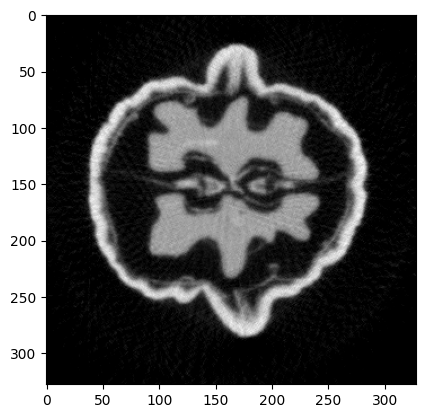

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plot results
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(x.reshape((int(np.sqrt(n)),int( np.sqrt(n)))), cmap='gray')
plt.show()

plt.figure()
plt.show()